In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
sachin_df = pd.read_excel('sachin.xlsx')

In [16]:
sachin_df.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start DateAscending,Match Number,Result
0,11,92,-,-,0,-,6,lbw,1,v Sri Lanka,Chandigarh,1990-11-23,Test # 1156,Won
1,50,158,118,6,0,42.37,4,caught,1,v England,Kolkata,1993-01-29,Test # 1211,Won
2,9,17,19,2,0,47.36,4,not out,4,v England,Kolkata,1993-01-29,Test # 1211,Won
3,165,361,296,24,1,55.74,4,caught,1,v England,Chennai,1993-02-11,Test # 1213,Won
4,78,285,213,10,0,36.61,4,lbw,2,v England,Mumbai,1993-02-19,Test # 1214,Won


In [17]:
sachin_df = sachin_df[sachin_df['BF'] != '-']

In [20]:
sachin_df = sachin_df[sachin_df['Runs'] != 'DNB']

In [21]:
sachin_df.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start DateAscending,Match Number,Result
1,50,158,118,6,0,42.37,4,caught,1,v England,Kolkata,1993-01-29,Test # 1211,Won
2,9,17,19,2,0,47.36,4,not out,4,v England,Kolkata,1993-01-29,Test # 1211,Won
3,165,361,296,24,1,55.74,4,caught,1,v England,Chennai,1993-02-11,Test # 1213,Won
4,78,285,213,10,0,36.61,4,lbw,2,v England,Mumbai,1993-02-19,Test # 1214,Won
5,62,128,114,7,0,54.38,4,caught,1,v Zimbabwe,Delhi,1993-03-13,Test # 1218,Won


In [47]:
sachin_df['Runs'].values.argmax()

54

In [49]:
sachin_df.iloc[54]

Runs                                   248
Mins                                   552
BF                                     379
4s                                      35
6s                                       0
SR                                   65.43
Pos                                      4
Dismissal                          not out
Inns                                     2
Opposition                    v Bangladesh
Ground                               Dhaka
Start DateAscending    2004-12-10 00:00:00
Match Number                   Test # 1725
Result                                 Won
Name: 57, dtype: object

In [22]:
X = sachin_df['BF'].values
y = sachin_df['Runs'].values

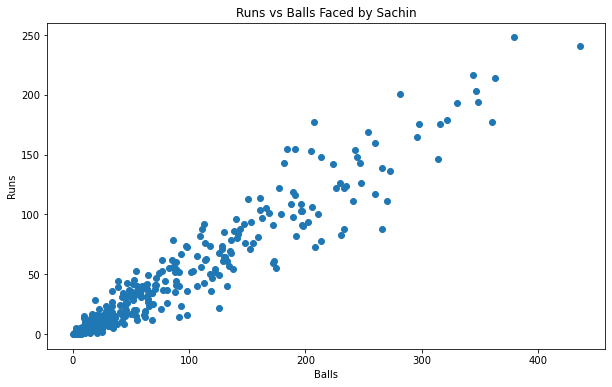

In [25]:
plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.xlabel('Balls')
plt.ylabel('Runs')
plt.title('Runs vs Balls Faced by Sachin')
plt.show()

In [26]:
mean_x = np.mean(X)
mean_y = np.mean(y)

In [27]:
n = len(X)
numer = 0
denom = 0

for i in range(n):
    numer += (X[i] - mean_x) * (y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2

slope = numer / denom
inter = mean_y - slope * mean_x

In [28]:
slope, inter

(0.5555043018993305, -1.34871992381278)

In [29]:
predictions = []
for i in range(n):
    y_pred = slope * X[i] + inter
    predictions.append(int(y_pred))

In [30]:
y[:5]

array([50, 9, 165, 78, 62], dtype=object)

In [31]:
predictions[:5]

[64, 9, 163, 116, 61]

In [32]:
pred_df = pd.DataFrame({'actual' : y, 'pred' : predictions})

In [34]:
pred_df.head(10)

,actual,pred
0,50,64
1,9,9
2,165,163
3,78,116
4,62,61
5,28,27
6,104,88
7,142,123
8,96,76
9,6,6


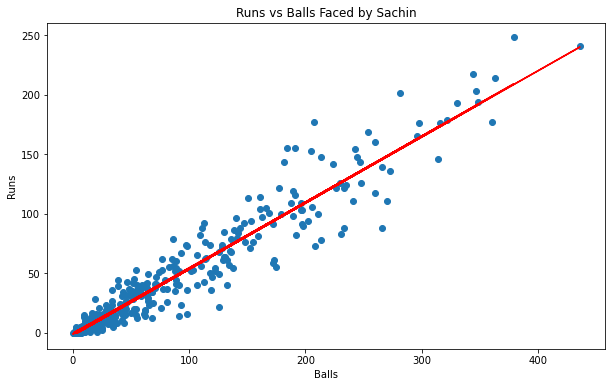

In [35]:
plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.plot(X, predictions, 'r')
plt.xlabel('Balls')
plt.ylabel('Runs')
plt.title('Runs vs Balls Faced by Sachin')
plt.show()

In [40]:
balls = 450

In [41]:
slope * balls + inter

248.62821593088597

In [50]:
err = 0

for i in range(n):
    err += (predictions[i] - y[i]) ** 2

error = (1/n) * err

In [51]:
print("MSE :",error)

MSE : 227.109756097561


In [52]:
mae = np.sqrt(error)

In [53]:
print("MAE :",mae)

MAE : 15.070161117173265
